## Import Libraries and load Data

In [2655]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from matplotlib import pyplot
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns

In [2569]:
df = pd.read_csv("marketing_campaign.csv", sep = '\t')

## Data Cleaning

### drop missing values 

In [2570]:
df.dropna(inplace=True)

In [2571]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### convert all columns to lowercase

In [2572]:
df.columns= df.columns.str.lower()

### drop unnecessary columns

In [2573]:
#drop "ID","Z_CostContact" and "Z_Revenue" column
df = df.drop(columns=["id", "z_costcontact","z_revenue"])

### create new column "age"

In [2574]:
df["age"] = 2014 - df["year_birth"]

In [2575]:
df["age"]

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: age, Length: 2216, dtype: int64

In [2576]:
#drop "year_birth"
df = df.drop(columns=["year_birth"])

### remove outliers in "age" column

In [2577]:
max(df["age"])

121

/Users/louisarudow/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

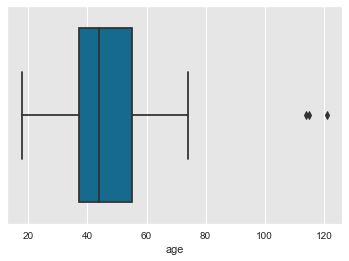

In [2578]:
sns.boxplot(df["age"])

In [2579]:
df.loc[df['age'] == 121]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
239,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,...,2,4,0,0,0,0,0,0,0,121


In [2580]:
df.drop([239], axis=0, inplace=True)

In [2581]:
max(df["age"])

115

In [2582]:
df.loc[df['age'] == 115]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
339,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,...,4,1,0,0,1,0,0,0,0,115


In [2583]:
df.drop([339], axis=0, inplace=True)

In [2584]:
max(df["age"])

114

In [2585]:
df.loc[df['age'] == 114]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
192,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,...,2,5,0,0,0,0,0,1,0,114


In [2586]:
df.drop([192], axis=0, inplace=True)

In [2587]:
max(df["age"])

74

### convert "dt_customer" to datetime

In [2588]:
type(df["dt_customer"][0])

str

def date(datestr="", format="%d-%m-%Y"):
    from datetime import datetime
    if not datestr:
        return datetime.today().date()
    return datetime.strptime(datestr, format).date()

In [2589]:
df["dt_customer"] = pd.to_datetime(df["dt_customer"], format="%d-%m-%Y")

In [2590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   education            2213 non-null   object        
 1   marital_status       2213 non-null   object        
 2   income               2213 non-null   float64       
 3   kidhome              2213 non-null   int64         
 4   teenhome             2213 non-null   int64         
 5   dt_customer          2213 non-null   datetime64[ns]
 6   recency              2213 non-null   int64         
 7   mntwines             2213 non-null   int64         
 8   mntfruits            2213 non-null   int64         
 9   mntmeatproducts      2213 non-null   int64         
 10  mntfishproducts      2213 non-null   int64         
 11  mntsweetproducts     2213 non-null   int64         
 12  mntgoldprods         2213 non-null   int64         
 13  numdealspurchases    2213 non-nul

In [2591]:
max(df["dt_customer"])

Timestamp('2014-06-29 00:00:00')

### create "cust_since" column + drop "dt_customer"

In [2592]:
#Convert datetime column/series to month
df['cust_since'] = df['dt_customer'].dt.month

In [2593]:
df['cust_since']

0        9
1        3
2        8
3        2
4        1
        ..
2235     6
2236     6
2237     1
2238     1
2239    10
Name: cust_since, Length: 2213, dtype: int64

In [2594]:
df["cust_since"] = (max(df["dt_customer"]) - df["dt_customer"]).astype('timedelta64[M]')

In [2595]:
df["cust_since"]

0       21.0
1        3.0
2       10.0
3        4.0
4        5.0
        ... 
2235    12.0
2236     0.0
2237     5.0
2238     5.0
2239    20.0
Name: cust_since, Length: 2213, dtype: float64

In [2596]:
df[["cust_since", "dt_customer"]]

,cust_since,dt_customer
0,21.0,2012-09-04
1,3.0,2014-03-08
2,10.0,2013-08-21
3,4.0,2014-02-10
4,5.0,2014-01-19
...,...,...
2235,12.0,2013-06-13
2236,0.0,2014-06-10
2237,5.0,2014-01-25
2238,5.0,2014-01-24


In [2597]:
#drop "dt_customer"
df.drop(["dt_customer"],axis=1, inplace=True)

### clean education column

In [2598]:
df["education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [2599]:
def clean_edu(x):
    if x in ['Basic', '2n Cycle']:
        return "0"
    elif x in ['Graduation']:
        return "1"
    elif x in ['Master', 'PhD']:
        return "2"

In [2600]:
df['education'] = list(map(clean_edu, df['education']))

In [2601]:
df['education'] = df['education'].astype(int)

### convert "income" to int

In [2602]:
max(df["income"])

666666.0

In [2603]:
df.loc[df['income'] == 666666.0]

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cust_since
2233,1,Together,666666.0,1,0,23,9,14,18,8,...,6,0,0,0,0,0,0,0,37,12.0


In [2604]:
df.drop([2233], axis=0, inplace=True)

In [2605]:
df["income"] = df["income"].astype("Int64")

### clean "marital_status"

In [2606]:
df["marital_status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [2607]:
df.loc[df['marital_status'] == "YOLO"]

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cust_since
2177,2,YOLO,48432,0,1,3,322,3,50,4,...,8,0,0,0,0,0,0,0,41,20.0
2202,2,YOLO,48432,0,1,3,322,3,50,4,...,8,0,0,0,0,0,0,1,41,20.0


In [2608]:
#remove "YOLO" from "marital_status"
df = df.drop([2177, 2202])

In [2609]:
df["marital_status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd'], dtype=object)

In [2610]:
def clean_marital(x):
    if x in ['Together', 'Married']:
        return "0"
    elif x in ["Single", "Alone", "Widow", "Divorced", 'Absurd']:
        return "1"

In [2611]:
df['marital_status'] = list(map(clean_marital, df['marital_status']))

In [2612]:
df['marital_status'] = df['marital_status'].astype(int)

### new column "children"

In [2613]:
#concat "kidhome" and "teenhome" and create new column "children"
df["children"]= df["kidhome"] + df["teenhome"]

In [2614]:
#drop "kidhome", "teenhome" columns
#df = df.drop(columns=["kidhome","teenhome"])

### concatenate campaigns 

In [2615]:
df["acc_camp"] = df["acceptedcmp1"] + df["acceptedcmp2"] + df["acceptedcmp3"] + df["acceptedcmp4"] + df["acceptedcmp5"]

In [2616]:
df["acc_camp"].value_counts()

0    1752
1     322
2      81
3      44
4      11
Name: acc_camp, dtype: int64

In [2617]:
df = df.drop(columns=["acceptedcmp1", "acceptedcmp2","acceptedcmp3", "acceptedcmp4", "acceptedcmp5" ])

In [2618]:
# column "household_size"
# column "total_amount_spent"

### concatenate columns amounts spent 

In [2619]:
#df["total_spent"] = df["mntwines"]+ df["mntfruits"]+ df["mntmeatproducts"]+ df["mntfishproducts"]+ df["mntsweetproducts"]+ df["mntgoldprods"]

### creating household size column

In [2620]:
df.dtypes

education                int64
marital_status           int64
income                   Int64
kidhome                  int64
teenhome                 int64
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
complain                 int64
response                 int64
age                      int64
cust_since             float64
children                 int64
acc_camp                 int64
dtype: object

In [2621]:
df["household_size"] = df["marital_status"] + df["children"] + 1

In [2622]:
df.drop(["children"], axis=1, inplace=True)

## plotting

### correlation heatmap

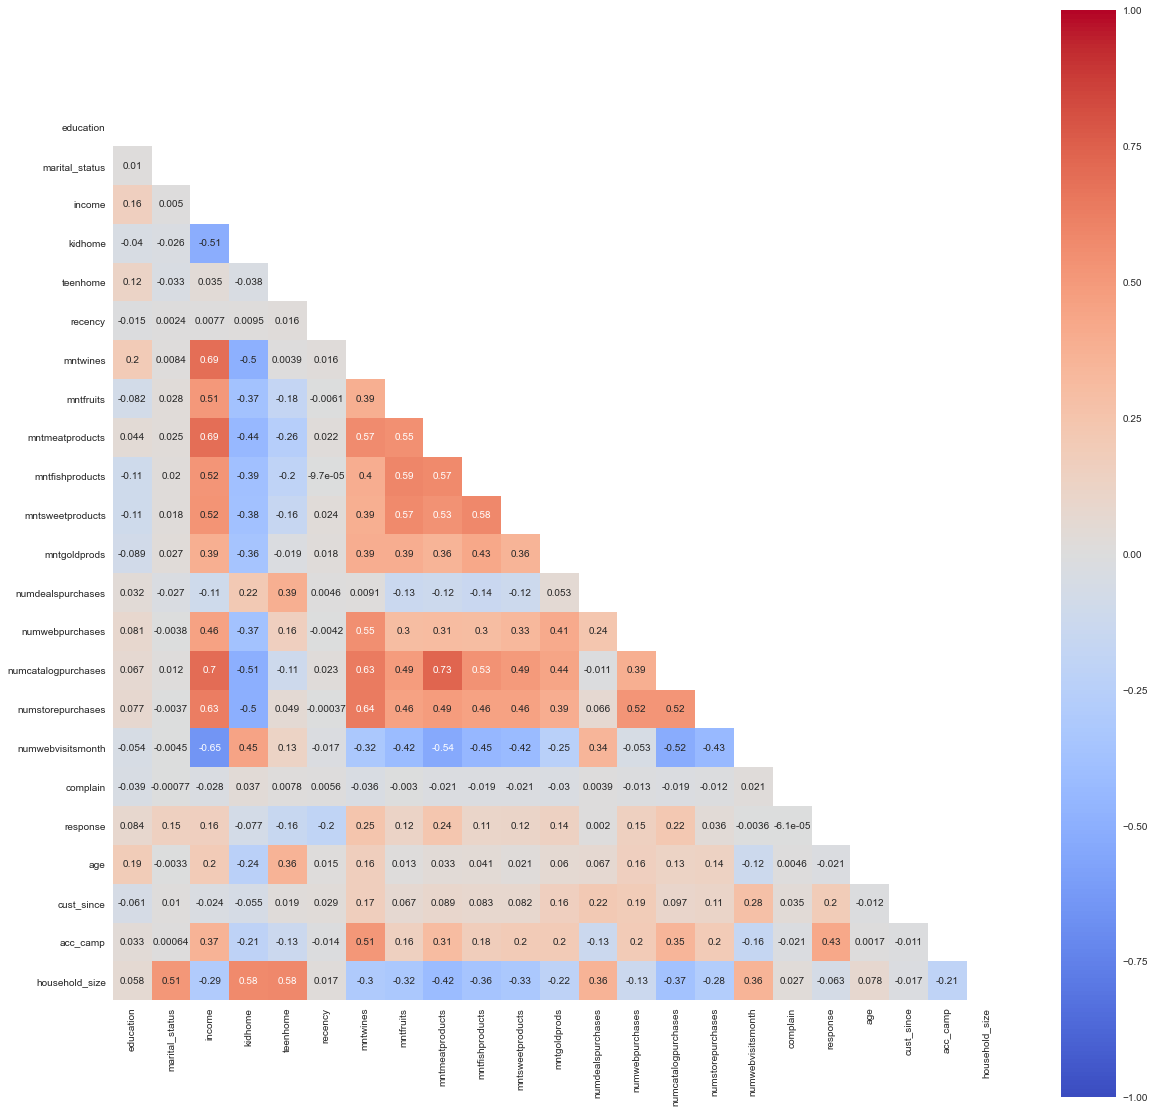

In [2623]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [2624]:
import seaborn as sns
import matplotlib.pyplot as plt

c = abs(df.corr())
#c

#fig, ax = plt.subplots(figsize=(14,14))
#sns.heatmap(c, annot=True);

#c['SalePrice']
c_last = c['income'].sort_values(ascending=False)
#c_last
c_thr = .3
cols_to_keep = list(c_last[c_last > c_thr].index)[1:] + [list(c_last[c_last > c_thr].index)[0]]
print(cols_to_keep)

df[cols_to_keep]

['numcatalogpurchases', 'mntmeatproducts', 'mntwines', 'numwebvisitsmonth', 'numstorepurchases', 'mntsweetproducts', 'mntfishproducts', 'kidhome', 'mntfruits', 'numwebpurchases', 'mntgoldprods', 'acc_camp', 'income']


,numcatalogpurchases,mntmeatproducts,mntwines,numwebvisitsmonth,numstorepurchases,mntsweetproducts,mntfishproducts,kidhome,mntfruits,numwebpurchases,mntgoldprods,acc_camp,income
0,10,546,635,7,4,88,172,0,88,8,88,0,58138
1,1,6,11,5,2,1,2,1,1,1,6,0,46344
2,2,127,426,4,10,21,111,0,49,8,42,0,71613
3,0,20,11,6,4,3,10,1,4,2,5,0,26646
4,3,118,173,5,6,27,46,1,43,5,15,0,58293
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,182,709,5,4,118,42,0,43,9,247,0,61223
2236,2,30,406,7,5,0,0,2,0,8,8,1,64014
2237,3,217,908,6,13,12,32,0,48,2,24,1,56981
2238,5,214,428,3,10,30,80,0,30,6,61,0,69245


### export excel to tableau

In [2625]:
df.to_excel(r'df_clean.xlsx', index = False)

In [2626]:
df.describe()

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,household_size
count,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,...,2210.000000,2210.000000,2210.000000,2210.000000,2210.00000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000
mean,1.267421,0.353846,51962.002262,0.442081,0.505430,49.061086,305.272398,26.350679,167.135747,37.679186,...,4.085520,2.673756,5.806335,5.319005,0.00905,0.150226,45.090045,11.113122,0.298643,2.301357
std,0.651270,0.478270,21536.760214,0.537033,0.544296,28.923063,337.475234,39.755837,224.328327,54.787459,...,2.742027,2.928434,3.252405,2.425355,0.09472,0.357374,11.706248,6.633718,0.679818,0.871898
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,18.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,35208.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,2.000000,0.000000,3.000000,3.000000,0.00000,0.000000,37.000000,5.000000,0.000000,2.000000
50%,1.000000,0.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,4.000000,2.000000,5.000000,6.000000,0.00000,0.000000,44.000000,11.000000,0.000000,2.000000
75%,2.000000,1.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.750000,50.000000,...,6.000000,4.000000,8.000000,7.000000,0.00000,0.000000,55.000000,17.000000,0.000000,3.000000
max,2.000000,1.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,27.000000,28.000000,13.000000,20.000000,1.00000,1.000000,74.000000,22.000000,4.000000,5.000000


### histograms

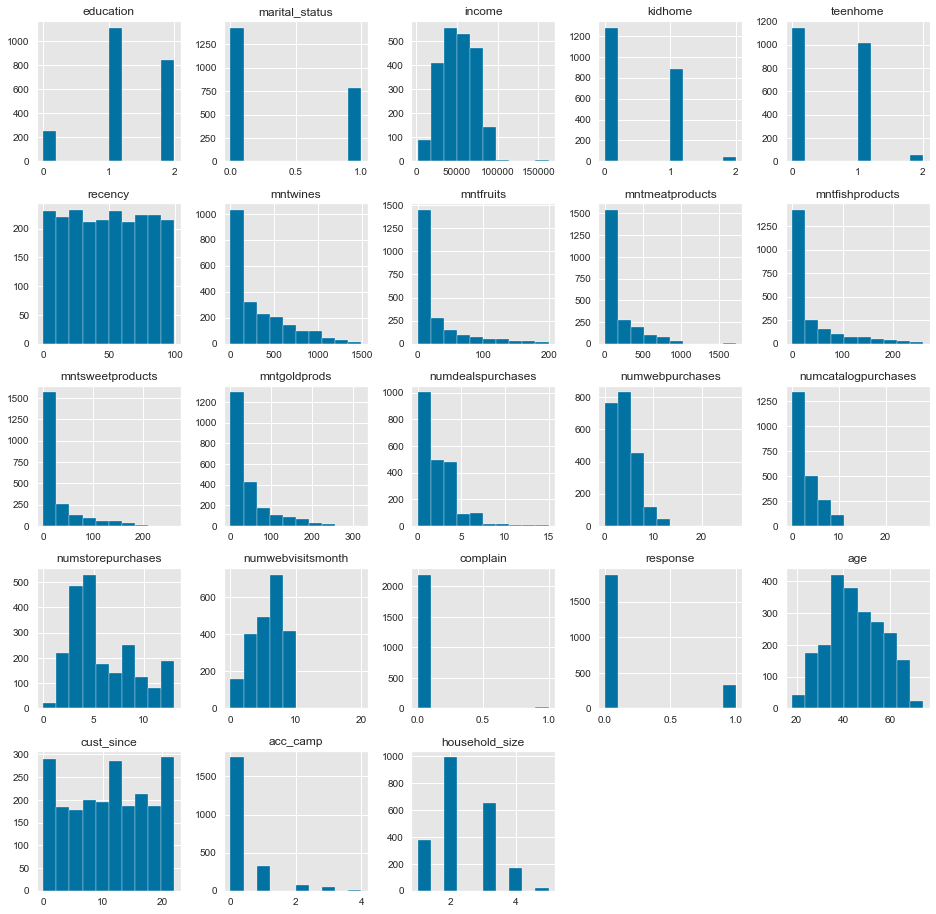

In [2627]:
df.hist(figsize=(16,16))
plt.show()

## preprocessing for modeling

### encode categorical features

In [2628]:
# heatmap to show mean of each feature in the cluster
from sklearn.preprocessing import OneHotEncoder

In [2629]:
df["marital_status"]=pd.get_dummies(df["marital_status"], drop_first=True)

In [2630]:
df["marital_status"]

0       1
1       1
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Name: marital_status, Length: 2210, dtype: uint8

### Standard scaler

In [2631]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled_df = pd.DataFrame(df_scaled, columns = df.columns)
display(df.head())
print()
display(df_scaled_df.head())

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,household_size
0,1,1,58138,0,0,58,635,88,546,172,...,8,10,4,7,0,1,57,21.0,0,2
1,1,1,46344,1,1,38,11,1,6,2,...,1,1,2,5,0,0,60,3.0,0,4
2,1,0,71613,0,0,26,426,49,127,111,...,8,2,10,4,0,0,49,10.0,0,1
3,1,0,26646,1,0,26,11,4,20,10,...,2,0,4,6,0,0,30,4.0,0,2
4,2,0,58293,1,0,94,173,43,118,46,...,5,3,6,5,0,0,33,5.0,0,2


,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,household_size
0,-0.410707,1.351328,0.286830,-0.823378,-0.928803,0.309128,0.977263,1.551050,1.689265,2.452226,...,1.427909,2.502328,-0.555510,0.693249,-0.095564,2.378366,1.017632,1.490735,-0.439397,-0.345712
1,-0.410707,1.351328,-0.260915,1.039125,0.908847,-0.382518,-0.872180,-0.637804,-0.718466,-0.651376,...,-1.125524,-0.571683,-1.170579,-0.131559,-0.095564,-0.420457,1.273963,-1.223290,-0.439397,1.948653
2,-0.410707,-0.740013,0.912646,-0.823378,-0.928803,-0.797506,0.357819,0.569840,-0.178956,1.338580,...,1.427909,-0.230126,1.289696,-0.543963,-0.095564,-0.420457,0.334081,-0.167836,-0.439397,-1.492895
3,-0.410707,-0.740013,-1.175745,1.039125,-0.928803,-0.797506,-0.872180,-0.562326,-0.656043,-0.505325,...,-0.760748,-0.913239,-0.555510,0.280845,-0.095564,-0.420457,-1.289351,-1.072511,-0.439397,-0.345712
4,1.125101,-0.740013,0.294029,1.039125,-0.928803,1.554091,-0.392036,0.418884,-0.219085,0.151909,...,0.333580,0.111431,0.059559,-0.131559,-0.095564,-0.420457,-1.033019,-0.921731,-0.439397,-0.345712


### PCA

from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')

pca.fit(df_scaled_df)

df_scaled_df = pca.transform(df_scaled_df)

cols = [ 'PCA_' + str(i) for i in list(range(1,len(df.columns)+1))]

df_scaled_df = pd.DataFrame(df_scaled_df, columns = cols)

df_scaled_df= df_scaled_df.iloc[:,:11]
df_scaled_df

#### Getting variances

print(pca.explained_variance_ratio_)

variances = pca.explained_variance_ratio_.tolist()

total_variance = [sum(variances[:i]) for i in range(1, len(variances)+1)]
scree = pd.DataFrame({'num_pca': range(1,len(variances)+1),'variance': variances,'cum_variance': total_variance})
scree.head(22)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(1,2,figsize=(16,8))

sns.lineplot(x="num_pca", y="variance", data=scree, ax = ax[0], color = 'black')
ax[0].set_xticks(range(1,32))
sns.barplot(x="num_pca", y="cum_variance", data=scree, ax = ax[1], color = 'lightblue')

#### Getting the pca coeficients

pca.components_

for comp in range(1,len(pca.components_)+1):
    print("Principal component ",comp)
    my_list = [(abs(value),index+1,df.columns[index],value) for index,value in enumerate(pca.components_[comp-1,:]) ]
    my_list.sort(reverse=True)
    my_list = [(elem[1],elem[2],round(elem[3],2)) for elem in my_list]
    print(my_list)
    print()

## K-Means clustering

In [2632]:
kmeans = KMeans(n_clusters=6, init="k-means++", random_state=1234)
kmeans.fit(df_scaled_df)

KMeans(n_clusters=6, random_state=1234)

In [2633]:
kmeans.labels_

array([3, 2, 3, ..., 3, 1, 2], dtype=int32)

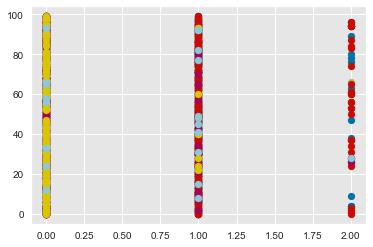

In [2634]:
# assign a cluster to each example
labels = kmeans.predict(df_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df.to_numpy()[row_ix, 3], df.to_numpy()[row_ix, 5])
    # show the plot
pyplot.show()

In [2635]:
clusters = kmeans.predict(df_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    589
1    516
2    494
3    437
4    154
5     20
dtype: int64

In [2636]:
#df = pd.DataFrame(df)
df["cluster"] = clusters

In [2637]:
df[df['cluster'] == 2].sample()

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,household_size,cluster
1527,1,0,28087,1,1,77,53,8,17,13,...,2,2,7,0,0,56,18.0,0,3,2


In [2638]:
kmeans.inertia_

30147.005039792595

In [2639]:
kmeans2 = KMeans(n_clusters=6,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(df_scaled_df)
print(kmeans2.inertia_)

30149.66282875186


### Elbow method

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

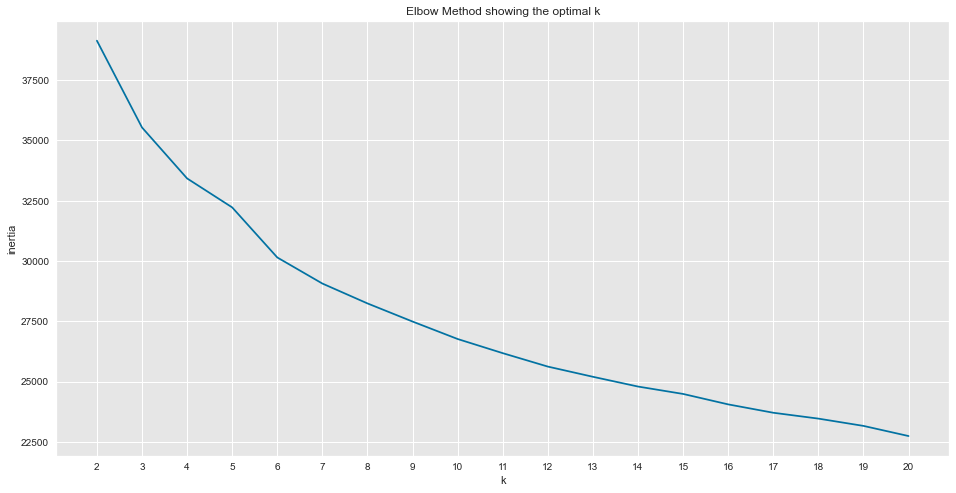

In [2640]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silhouette method

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

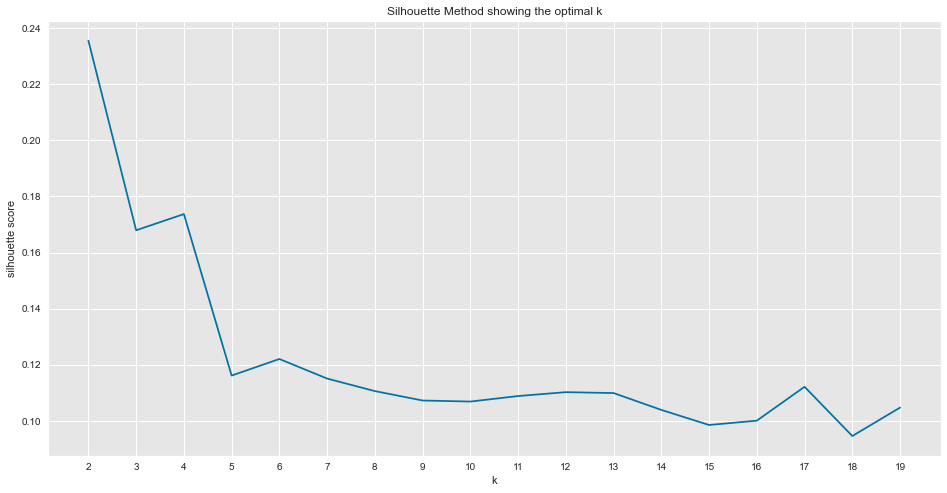

In [2641]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    
   
    
    silhouette.append(silhouette_score(df_scaled_df, kmeans.predict(df_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

### visualize Silhouette

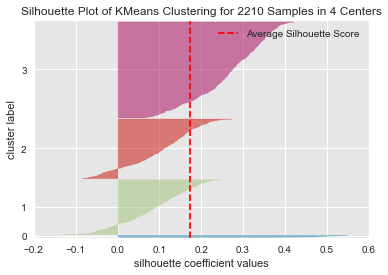

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2210 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [2642]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(4, random_state=1234)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_scaled_df)        
visualizer.show()       

### Ninas Heatmap

In [2643]:
df = df.reset_index(drop=True)

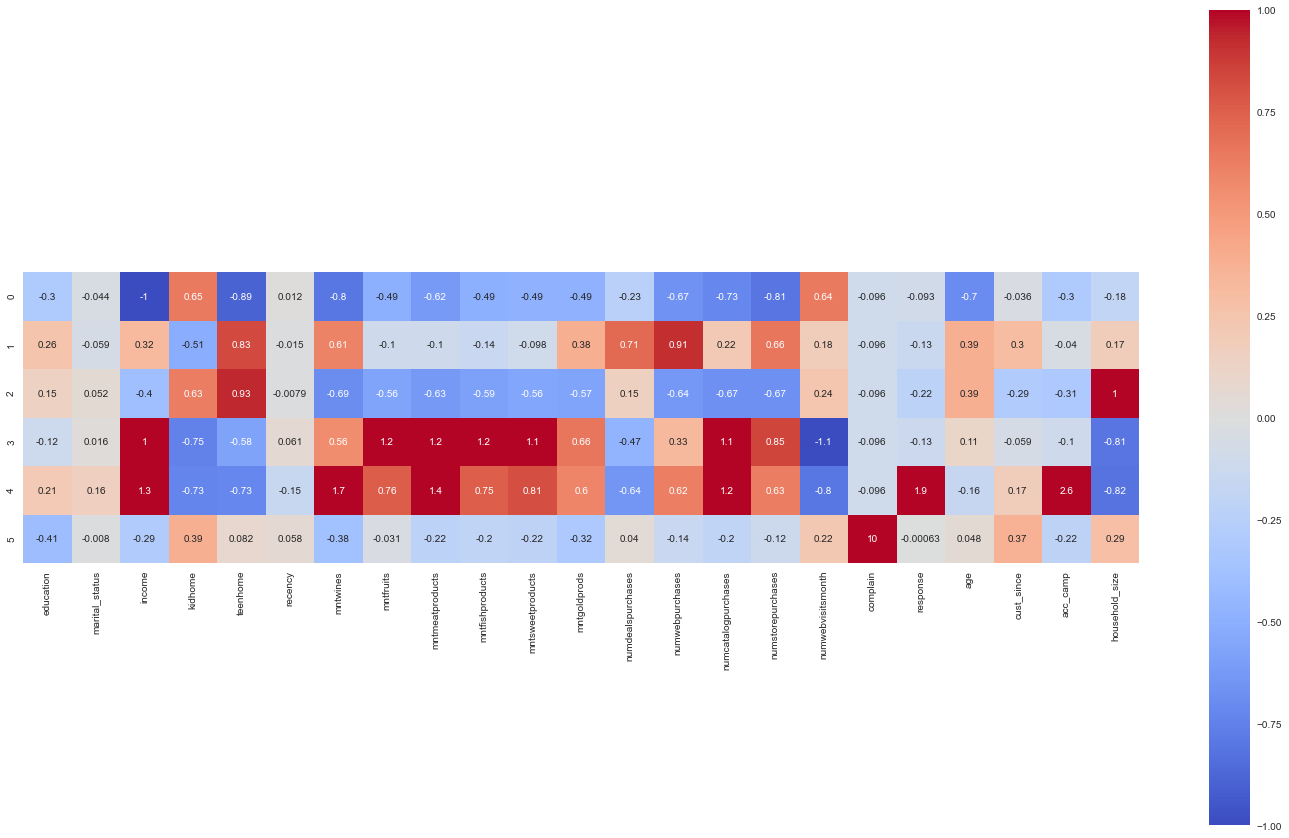

In [2644]:
## create dictionary of cluster membership for each label
cluster_labels = np.unique(df.cluster)
cluster_members = {}
for clusters in cluster_labels:
    cluster_members[clusters] = np.where(df.cluster == clusters)

## for each cluster label (ky) calculate the mean for each feature
scaled_feature_means_by_cluster = pd.DataFrame([df_scaled_df.loc[cluster_members[ky]].mean(numeric_only=True) for ky in cluster_members.keys()])

## --- plot results as heatma
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 15))
    ax = sns.heatmap(scaled_feature_means_by_cluster, cmap='coolwarm', vmin=-1, vmax=1, annot=True, square=True)


## Describing the cluster

### Income

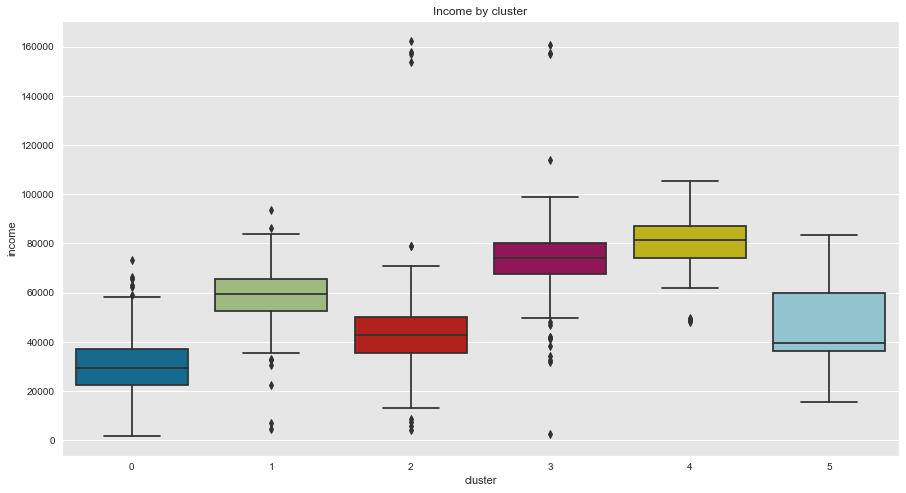

In [2652]:
#Plotting the number of deals purchased
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["income"],x=df["cluster"])
pl.set_title("Income by cluster")
plt.show()

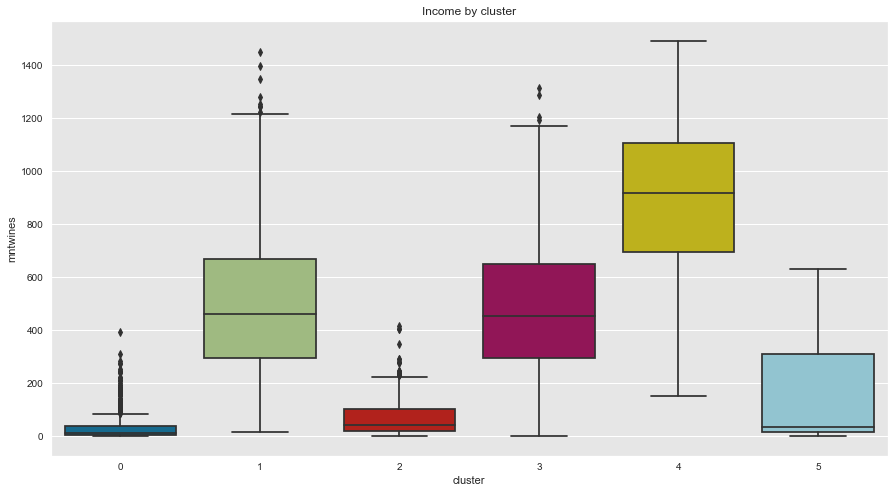

In [2657]:
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["mntwines"],x=df["cluster"])
pl.set_title("Wine by cluster")
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='count'>

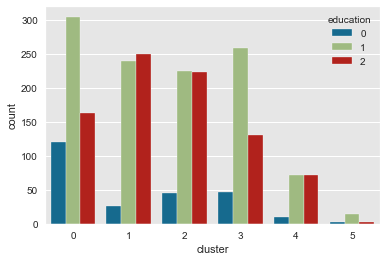

In [2659]:
sns.countplot(x = df["cluster"],y = None, hue=df["education"], palette=None)


<AxesSubplot:xlabel='cluster', ylabel='count'>

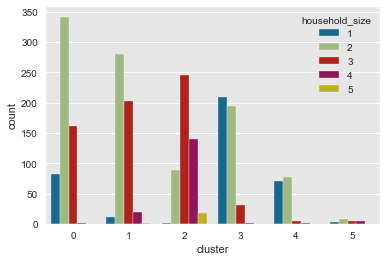

In [2661]:
sns.countplot(x = df["cluster"],y = None, hue=df["household_size"], palette=None)

<AxesSubplot:xlabel='cluster', ylabel='count'>

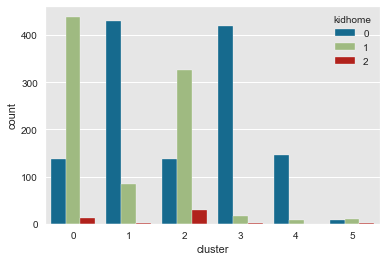

In [2662]:
sns.countplot(x = df["cluster"],y = None, hue=df["kidhome"], palette=None)

<AxesSubplot:xlabel='cluster', ylabel='count'>

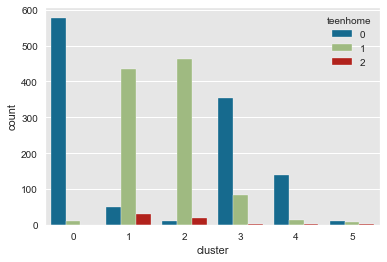

In [2663]:
sns.countplot(x = df["cluster"],y = None, hue=df["teenhome"], palette=None)

/Users/louisarudow/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


<AxesSubplot:xlabel='cluster', ylabel='count'>

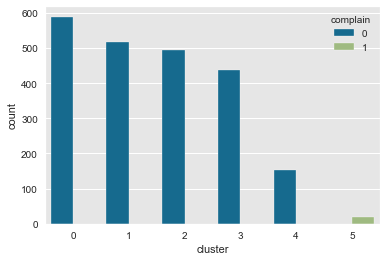

In [2665]:
sns.countplot(x = df["cluster"],y = None, hue=df["complain"], palette=None)

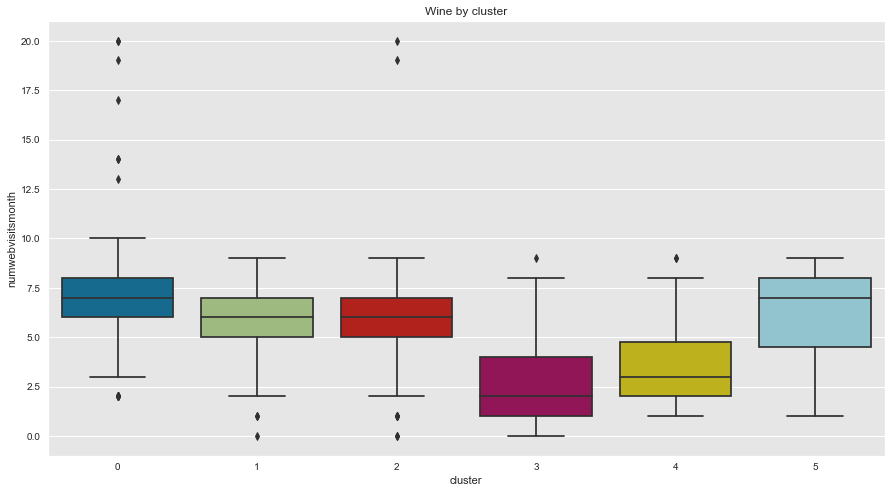

In [2666]:
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["numwebvisitsmonth"],x=df["cluster"])
pl.set_title("Wine by cluster")
plt.show()


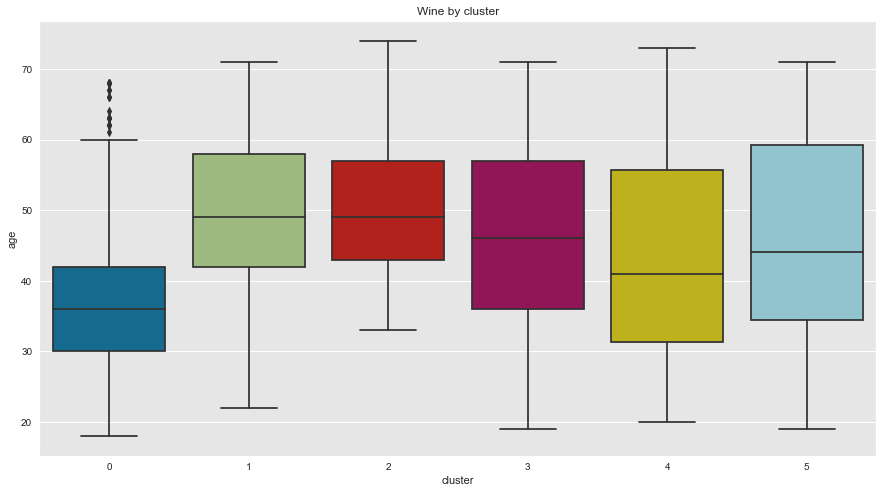

In [2667]:
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["age"],x=df["cluster"])
pl.set_title("Wine by cluster")
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='count'>

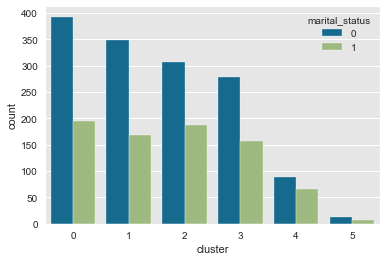

In [2668]:
sns.countplot(x = df["cluster"],y = None, hue=df["marital_status"], palette=None)

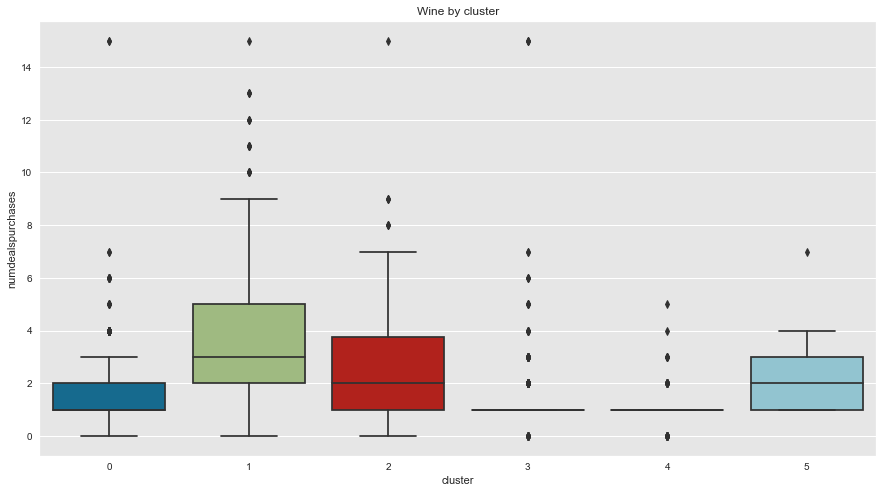

In [2669]:
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["numdealspurchases"],x=df["cluster"])
pl.set_title("Wine by cluster")
plt.show()